In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.datasets import load_iris
import graphviz 

%matplotlib inline
sns.set(rc={"figure.figsize": (10, 7)})


In [65]:
data = pd.read_csv("https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv")
data.tail()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
995,8,3.2,1,0,1,котик
996,7,2.8,1,0,1,котик
997,6,2.4,1,0,1,котик
998,7,2.8,1,0,1,котик
999,11,4.4,1,0,1,котик


In [66]:
d = {"собачка": 1, "котик": 0}
data["Вид"] = data["Вид"].map(d)
data

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,1
1,20,24.0,1,0,0,1
2,34,40.8,1,1,0,1
3,26,31.2,1,1,0,1
4,16,19.2,1,1,0,1
...,...,...,...,...,...,...
995,8,3.2,1,0,1,0
996,7,2.8,1,0,1,0
997,6,2.4,1,0,1,0
998,7,2.8,1,0,1,0


In [67]:
# 1 - Dog, 0 - Cat
data = pd.get_dummies(data, drop_first=1)
data.rename({"Вид_собачка": "Вид"}, axis=1, inplace=True)
data.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,1
1,20,24.0,1,0,0,1
2,34,40.8,1,1,0,1
3,26,31.2,1,1,0,1
4,16,19.2,1,1,0,1


In [68]:
X = data.drop("Вид", axis=1)
y = data["Вид"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [69]:
X_train.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
180,20,24.0,1,1,0
280,26,31.2,1,1,0
938,10,4.0,1,0,1
505,14,5.6,1,0,1
695,9,3.6,1,0,1


In [70]:
y_train.head()

180    1
280    1
938    0
505    0
695    0
Name: Вид, dtype: int64

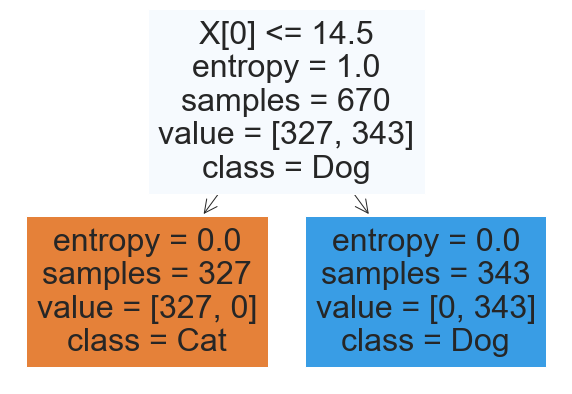

In [71]:
clf = tree.DecisionTreeClassifier(criterion="entropy", min_samples_split=5 )
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
plot_tree(clf,
          filled=True,
          class_names=["Cat", "Dog"])
None

In [72]:
data = pd.read_csv("https://stepik.org/media/attachments/course/4852/train_data_tree.csv")

In [73]:
data.head()

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


In [74]:
X_train = data.drop("num", axis=1)
y_train = data["num"]

In [75]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train, y_train)
clf.tree_

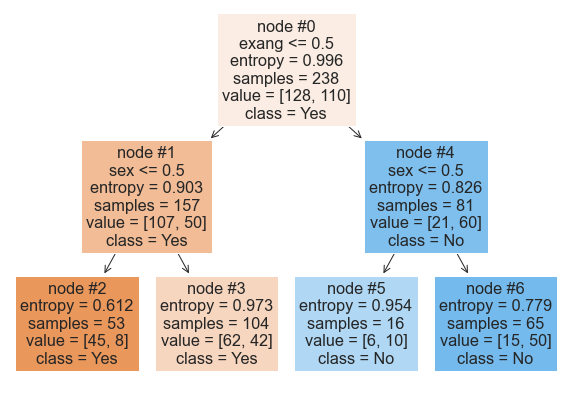

In [76]:
tree.plot_tree(clf,
               feature_names=X_train.columns,
               class_names=["Yes", "No"],
               filled=True,
               node_ids=True
               )
None

In [77]:

l_node = clf.tree_.children_left[0] # индекс корня левого поддерева
n1 = clf.tree_.n_node_samples[l_node] # сэмплов в левом поддереве
e1 = clf.tree_.impurity[l_node] # энтропия в корне левого поддерева

In [79]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [83]:
df = tree.DecisionTreeClassifier()
df.fit(X_train, y_train)
predicted = df.predict(X_test)

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 1, 2, 0,
       0, 0, 0, 1, 0, 2, 2, 2, 2, 0, 1, 0, 2, 2, 0, 1])